**Importing necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics


**Data Collection and Analysis**

In [ ]:
#loading the dataset
data=pd.read_csv('advertising.csv')
print(data)

        TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]


In [ ]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
#checking for missing values
data.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


**Data Analysis**

In [ ]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


**Data Visualization**

<ipython-input-8-6b806ee787eb>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Sales'], color='green')


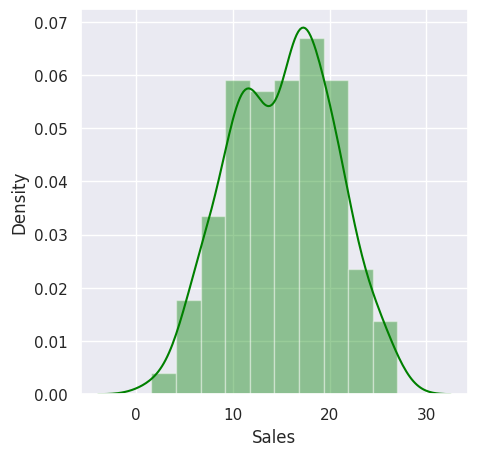

In [ ]:
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(data['Sales'], color='green')
plt.show()

<ipython-input-9-2768327714c4>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['TV'], color='aqua')


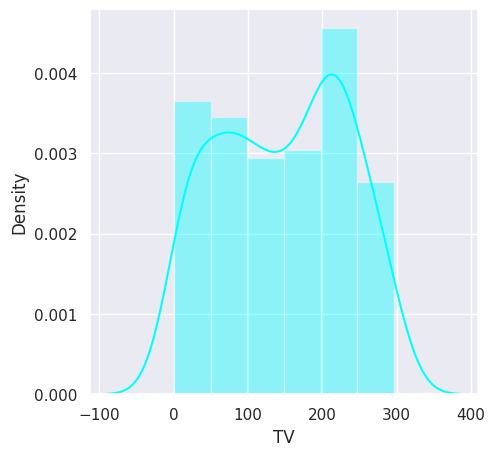

In [ ]:
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(data['TV'], color='aqua')
plt.show()

<ipython-input-10-5910ba167af2>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Radio'], color='salmon')


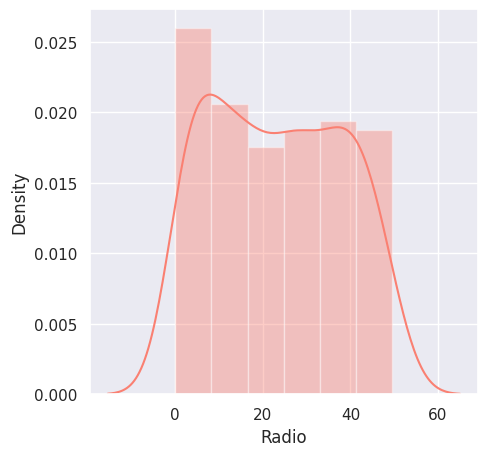

In [ ]:
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(data['Radio'], color='salmon')
plt.show()

<ipython-input-11-6703fb9ed8a8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Newspaper'], color='purple')


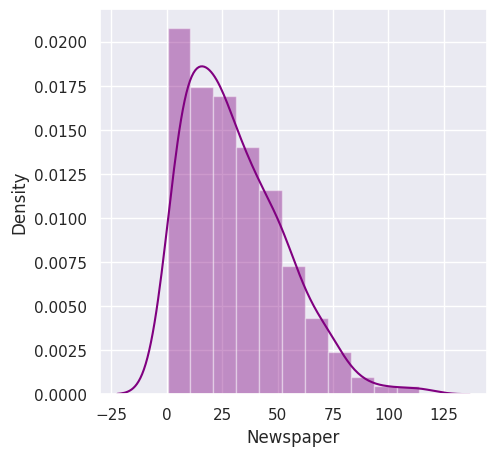

In [ ]:
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(data['Newspaper'], color='purple')
plt.show()

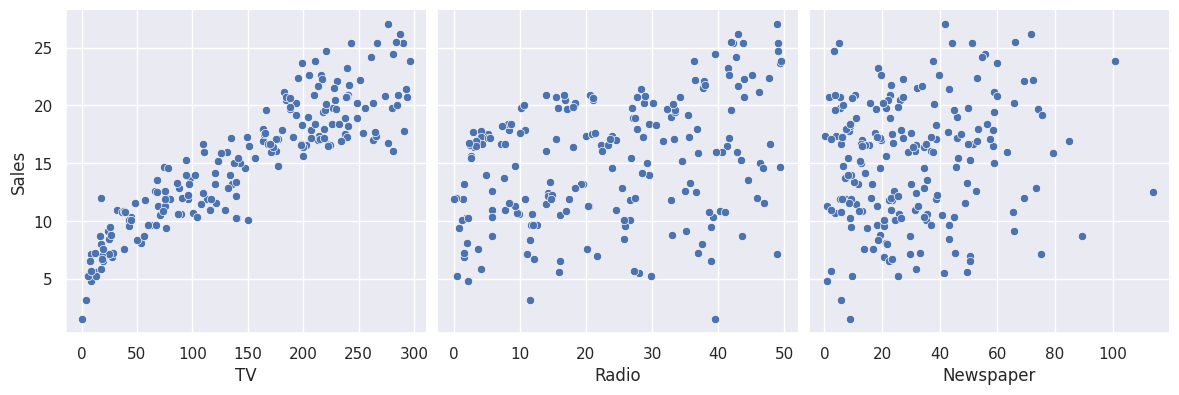

In [ ]:
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

The sales increases when it is advertised on TV while the sales for Radio Newspaper is unpredictable

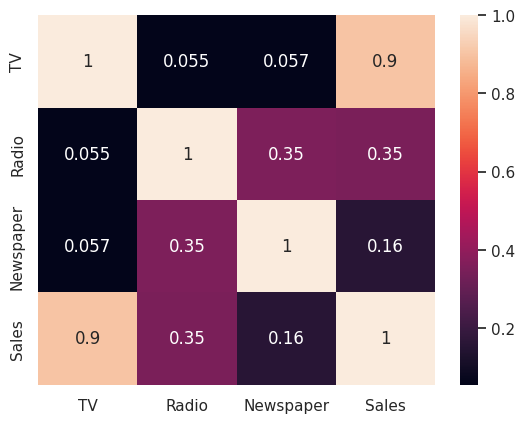

In [ ]:
sns.heatmap(data.corr(), annot=True)
plt.show()

**Model Training**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[["TV"]],data[["Sales"]], test_size=0.2, random_state=42) #using 20% dataset for testing

In [ ]:
print(x_train)

        TV
79   116.0
197  177.0
38    43.1
24    62.3
122  224.0
..     ...
106   25.0
14   204.1
92   217.7
179  165.6
102  280.2

[160 rows x 1 columns]


In [ ]:
print(y_train)

     Sales
79    11.0
197   14.8
38    10.1
24     9.7
122   16.6
..     ...
106    7.2
14    19.0
92    19.4
179   17.6
102   19.8

[160 rows x 1 columns]


In [ ]:
print(x_test)

        TV
95   163.3
15   195.4
30   292.9
158   11.7
128  220.3
115   75.1
69   216.8
170   50.0
174  222.4
45   175.1
66    31.5
182   56.2
165  234.5
78     5.4
186  139.5
177  170.2
56     7.3
152  197.6
82    75.3
68   237.4
124  229.5
16    67.8
148   38.0
93   250.9
65    69.0
60    53.5
84   213.5
67   139.3
125   87.2
132    8.4
9    199.8
18    69.2
55   198.9
75    16.9
150  280.7
104  238.2
135   48.3
137  273.7
164  117.2
76    27.5


In [ ]:
print(y_test)

     Sales
95    16.9
15    22.4
30    21.4
158    7.3
128   24.7
115   12.6
69    22.3
170    8.4
174   16.5
45    16.1
66    11.0
182    8.7
165   16.9
78     5.3
186   10.3
177   16.7
56     5.5
152   16.6
82    11.3
68    18.9
124   19.7
16    12.5
148   10.9
93    22.2
65    11.3
60     8.1
84    21.7
67    13.4
125   10.6
132    5.7
9     15.6
18    11.3
55    23.7
75     8.7
150   16.1
104   20.7
135   11.6
137   20.8
164   11.9
76     6.9


In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(160, 1) (40, 1) (160, 1) (40, 1)


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
print(model.predict(x_test))

[[16.06747317]
 [17.84847567]
 [23.25806271]
 [ 7.65625887]
 [19.23000098]
 [11.17387752]
 [19.03581067]
 [ 9.78125562]
 [19.34651516]
 [16.72217191]
 [ 8.75482116]
 [10.12524988]
 [20.01785878]
 [ 7.30671633]
 [14.74697911]
 [16.45030549]
 [ 7.41213392]
 [17.97053815]
 [11.18497411]
 [20.17875932]
 [19.74044406]
 [10.76885203]
 [ 9.1154603 ]
 [20.92777906]
 [10.83543156]
 [ 9.97544593]
 [18.85271696]
 [14.73588252]
 [11.84522114]
 [ 7.47316516]
 [18.09260063]
 [10.84652815]
 [18.04266598]
 [ 7.94477018]
 [22.58117079]
 [20.22314567]
 [ 9.68693462]
 [22.19279018]
 [13.50970946]
 [ 8.53288939]]


In [ ]:
model.coef_

array([[0.05548294]])

In [ ]:
model.intercept_

array([7.00710843])

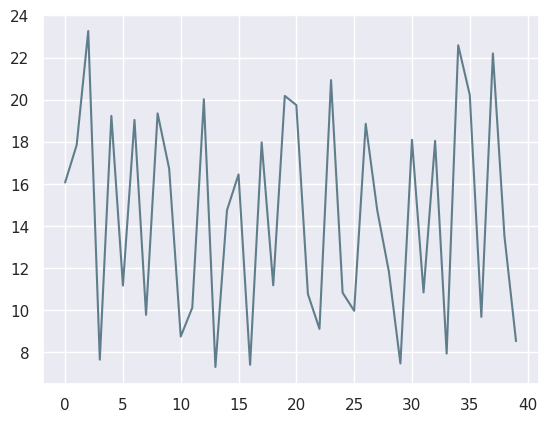

In [ ]:
plt.plot(model.predict(x_test), color ="#607d8b")

In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=lr.predict(x_test)

**Analyzing performance of Linear Regression Model**

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test,y_pred)

0.802561303423698

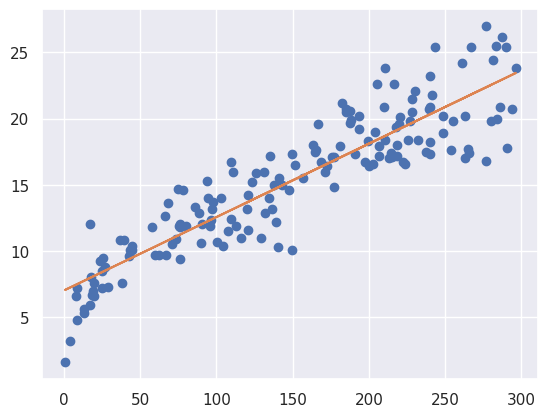

In [ ]:
plt.plot(x_train, y_train, 'o')
plt.plot(x_train, model.predict(x_train))
plt.show()